# ***Ejemplo ADALINE en Iris dataset (2 características)***

Esta versión usa el algoritmo de clase **AdalineGD**:


Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

La arquitectura del Adaline presetada a continuación es:

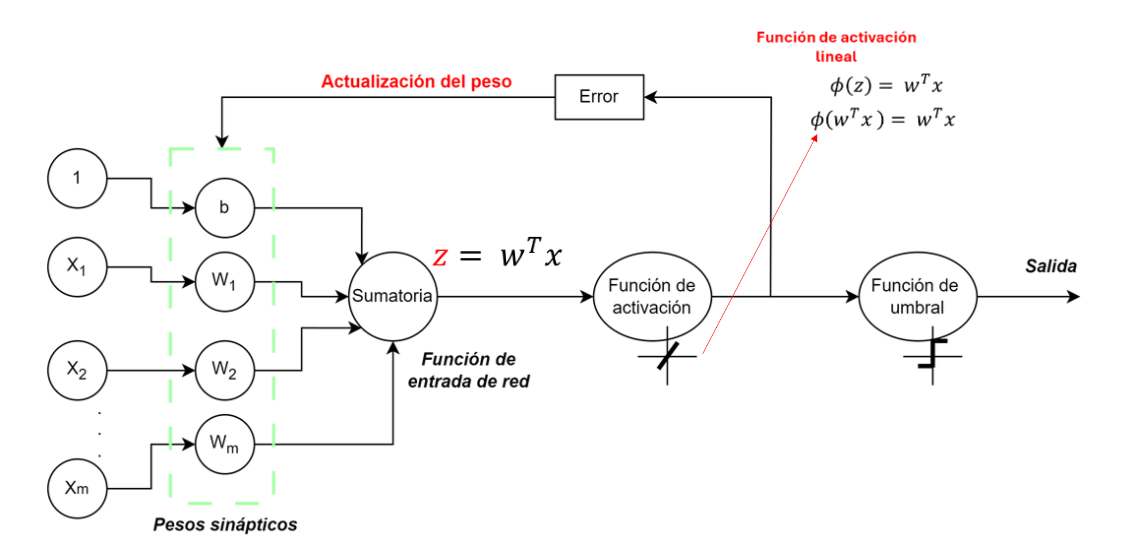

Dado que el algoritmo Adaline usa el método del descenso del gradiente para optimizar la función de coste J(w), es necesario implementar la actualización de pesos bajo la siguiente regla de aprendizaje:

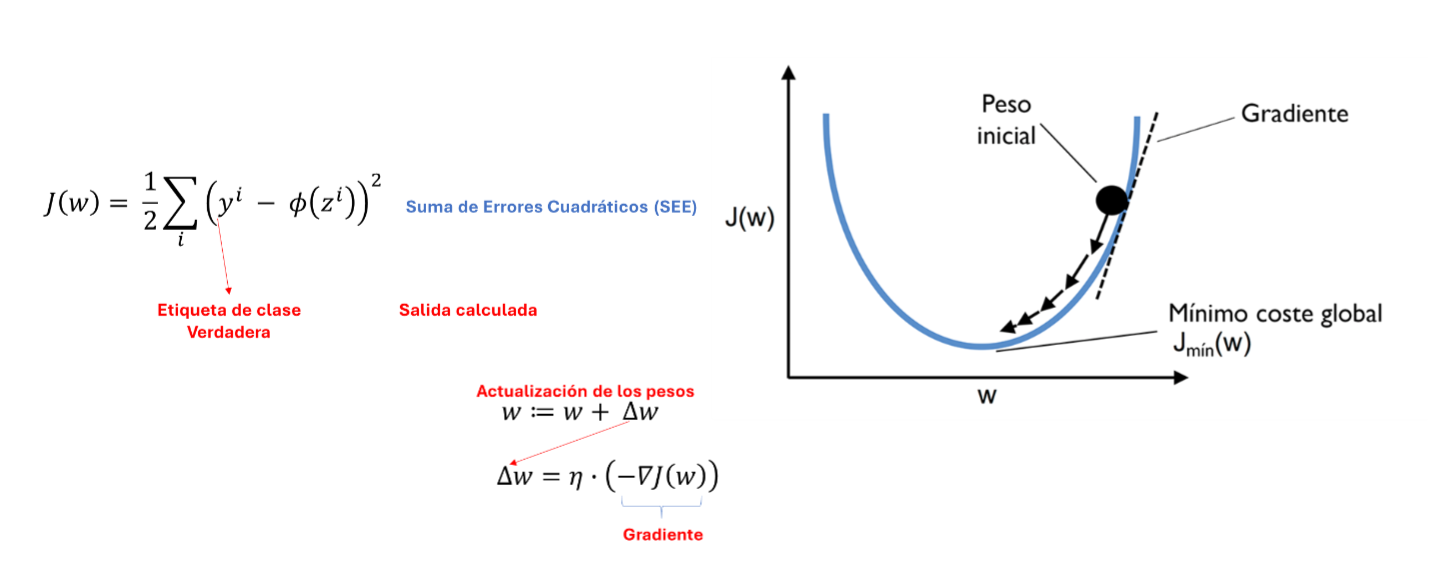

Si se desea calcular el gradiente de J(w) es necesario calcular las derivadas parciales para obtener éste, por tanto al realizar este proceso, obtenemos lo mostrado a continuación.

Observe que la descripción breve de la operación es:



*   El valor 1/2 es constante así que sale de la operación.
*   Al realizar la derivada parcial del termino encerrado en parénsetis, el 2
baja como constante y por ende sale de la operación, quedando pendiente la derivada interna del término (regla de la cadena). el 1/2 se cancela con el 2.
*   La derivada parcial del término interno depende de y (target objetivos) y de la neta (entradas multiplicadas por los pesos sinápticos más el bias).
*   Por tanto, si se analiza con calma, ni los valores "y" de los target objetivos, ni las entradas (x) dependen de los pesos sinápticos (w), por tanto al derivar el témino "y" desaparece (derevida igual a 0), y el término "w" da igual a 1 (derivada de la variable parcial), quedando unicamente el término "-x".






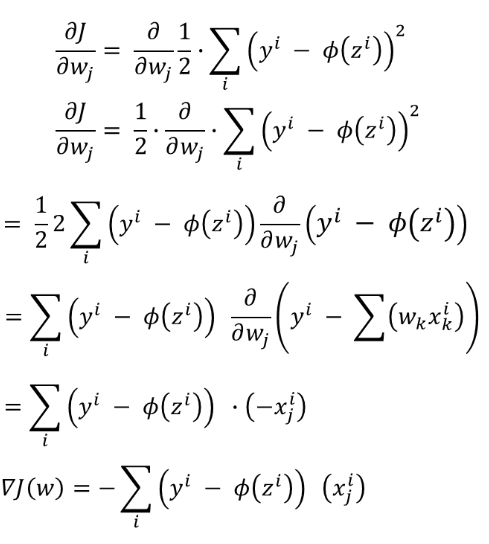

Al reemplazar el término recientemente obtenido, en el "delta de pesos w", se obtiene:

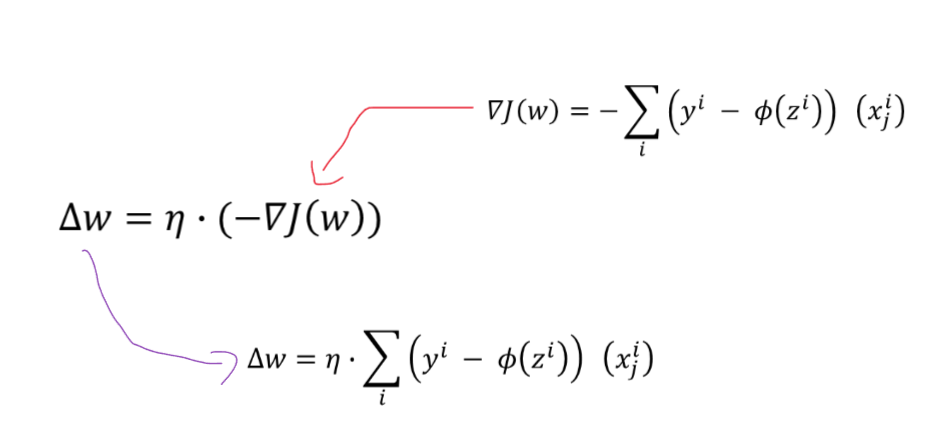

Clase **AdalineGD**

Documentada mediante comentarios:

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |cost_  : list
      Valro de la función de costo de suma de cuadrados en cada época.


    """
    #FUNCIÓN PARA INICIALIZAR MI ADALINE
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Datos de entrenamiento para ajustar.

          Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)


        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):

            #Se calcula la NETA para todos los valores de entrada
            net_input = self.net_input(X)

            #Observe por favor que a continuación se llama a la función de activación
            #Pero en realidad no tiene efecto, se podría colocar directamente:
            #output = self.net_input(X)
            #Pero el propósito es dejar dispuesto el código para usar la función de activación en otros casos.
            output = self.activation(net_input)

            errors = (y - output)

            self.w_[1:] += self.eta * X.T.dot(errors)

            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula el valor neto (Z)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Función de activación lineal"""
        return X

    def predict(self, X):
        """Retonar el valor de clase perteneciente"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Se procede a cargar la base de datos Iris y extraer la matriz de caracteristicas X:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

#Extraer la longitud del sépalo y la lontigud del pétalo
X = df.iloc[0:100, [0, 2]].values

print(X)
print(X.shape)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

y el vector de objetivos y. Nótese la dependecia de saturar los valores entre -1 y 1 debido a que la función de umbral final de la arquitectura presentada a usar sera el escalón binario bipolar.

In [ ]:
#Seleccionar unicamente la clase Setosa y la clase Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)
print(y.shape)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
(100,)


Se presenta la distribución de los datos para verificar básicamente como están distribuidos:

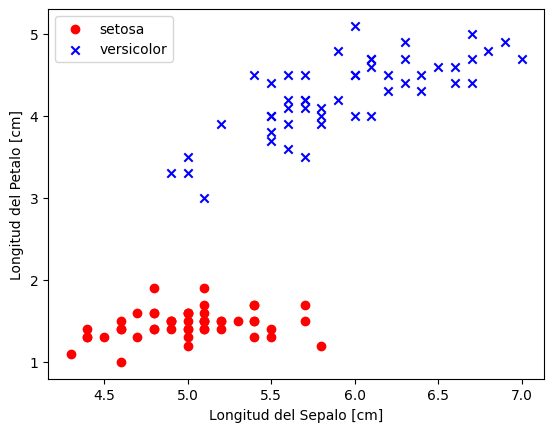

In [ ]:
#Graficar los datos
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('Longitud del Sepalo [cm]')
plt.ylabel('Longitud del Petalo [cm]')
plt.legend(loc='upper left')

plt.show()

Se procede entonces a crear dos objetvos tipo AdalineGD llamados ada1 y ada2, con la misma cantidad de iteraciones, pero diferentes valor del coeficiente de aprendizaje:

In [ ]:
ada1 = AdalineGD(n_iter=35, eta=0.01)
ada2 = AdalineGD(n_iter=35, eta=0.0001)

Se realiza el entrenamiento de ambos objetos:

In [ ]:
ada1.fit(X,y)
ada2.fit(X,y)

Se imprime los valores de la función de costo para ambos casos:

In [ ]:
print(ada1.cost_)
print(ada2.cost_)

[51.08122709777622, 3212.001733063833, 5006791.287179796, 7811818375.78158, 12188352557082.277, 1.9016819254863856e+16, 2.967090202540118e+19, 4.629388412448569e+22, 7.222981308409788e+25, 1.1269622320163618e+29, 1.7583374761230167e+32, 2.7434377054561068e+35, 4.280435664894914e+38, 6.678529439493226e+41, 1.0420143874600842e+45, 1.6257980046520628e+48, 2.536643623869233e+51, 3.957786180143272e+54, 6.175117111579157e+57, 9.634697178193025e+60, 1.5032490564659417e+64, 2.3454372088418438e+67, 3.659457278192181e+70, 5.709650857601255e+73, 8.908455663625516e+76, 1.3899375686891403e+80, 2.1686434975949957e+83, 3.383615728939898e+86, 5.279270388990234e+89, 8.23695657922749e+92, 1.2851672426093747e+96, 2.0051760933661326e+99, 3.1285664869915773e+102, 4.881331019210194e+105, 7.616073565377862e+108]
[51.08122709777622, 48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111, 39.

A continuación mediante un sub-plot se procede a graficar los resultados de la función de costo, pudiendose observar el pésimo desempeño en el caso del coeficiente de aprendizaje n=0.01 (Es tan así, que se presentan los valores usando la base logarítmica), en este caso nunca se minimizó el valor de coste sino por el contrario aumentó [Es decir para nada óptimo en el caso de interés]. Por otro lado, haber puesto n=0.0001 presentó un desempeño deseado, observando que cada vez que aumentaban las épocas el costo disminuía (Acercándonos más unos pesos w que generan un SEE menor):

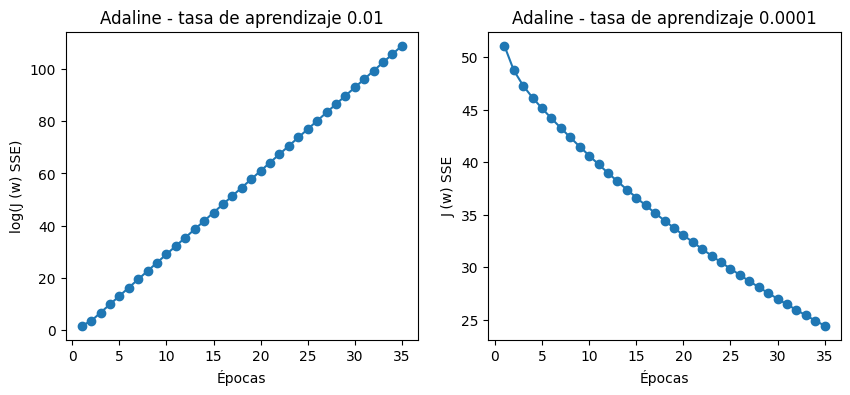

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(J (w) SSE)')
ax[0].set_title('Adaline - tasa de aprendizaje 0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('J (w) SSE')
ax[1].set_title('Adaline - tasa de aprendizaje 0.0001')

plt.show()



En pocas palabras, ahora se vuelve un problema, la buena elección de un coeficiente aprendizaje óptimo.

Escoger un óptimo valor implicaría un descenso de gradiente pausado, mientras que malo, puede genear "caer" en baches interminables en la obtención del mínimo valor, así:

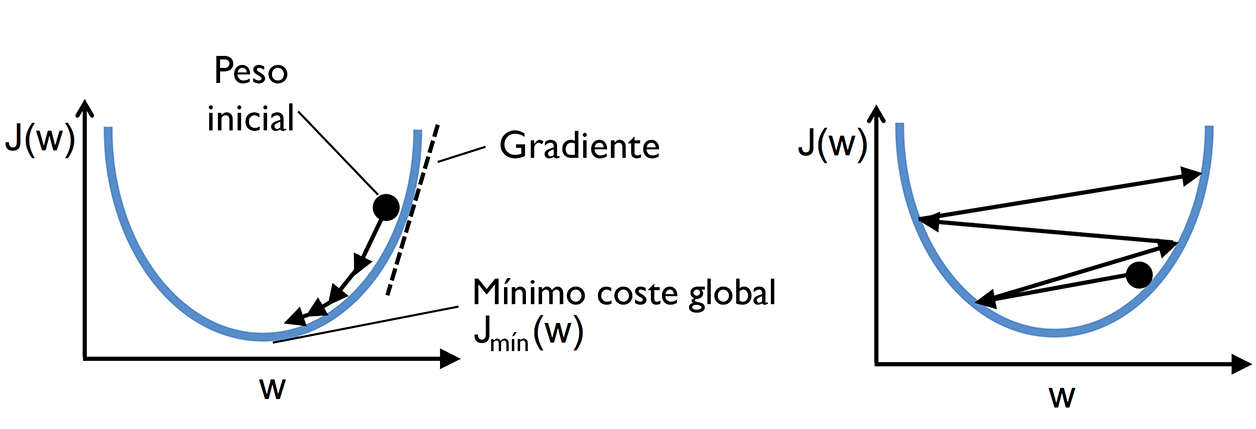

# **¿Como mejorar el descenso del gradiente mediante el escalado de las características?**

EL descenso del grandiente es uno de los tantos métodos que se benefician del escalado de características. En particular la **normalización** consiste en hacer que los datos de entrada (Características) tengan una distribución normal estándar, es decir: media cero (0) y desviación estándar uno (1).

Para lograrlo, podemos usar:

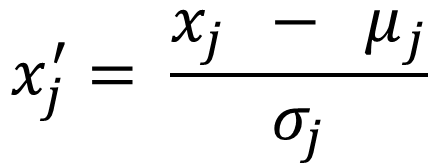

A continuación, lo realizamos sobre nuestras características. Observe que el "std" no es de desviación estandar sino de "standardized" osea estandarizado que es como se conoce a éste método al igual que normalización de los datos:

In [ ]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

A continuación se valida lo anteriormente mencionado:

In [ ]:
mean_X1 = X_std[:,0].mean()
print("Promedio de la característica X1: " + str(mean_X1))

mean_X2 = X_std[:,1].mean()
print("Promedio de la característica X1: " + str(mean_X2))

std_X1 = X_std[:,0].std()
print("Desviación estándar de la característica X1: " + str(std_X1))
std_X2 = X_std[:,1].std()
print("Desviación estándar de la característica X2: " + str(std_X2))

Promedio de la característica X1: -1.5182299861749016e-15
Promedio de la característica X1: -3.8635761256955447e-16
Desviación estándar de la característica X1: 0.9999999999999997
Desviación estándar de la característica X2: 0.9999999999999998


Se procede a graficar los datos ya estandarizados:

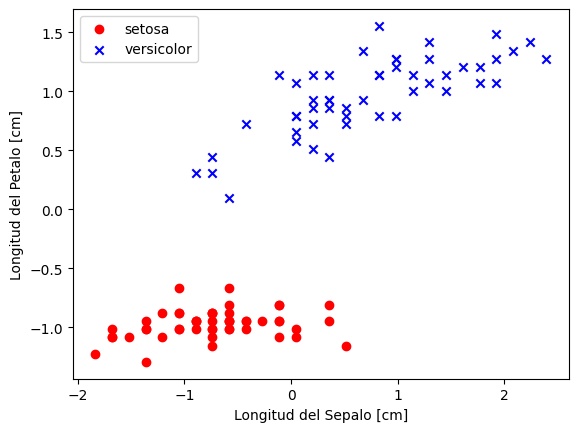

In [ ]:
#Graficar los datos
plt.scatter(X_std[:50, 0], X_std[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('Longitud del Sepalo [cm]')
plt.ylabel('Longitud del Petalo [cm]')
plt.legend(loc='upper left')

plt.show()

Se procede a relizar los histogramas de cada característica por cada clase:

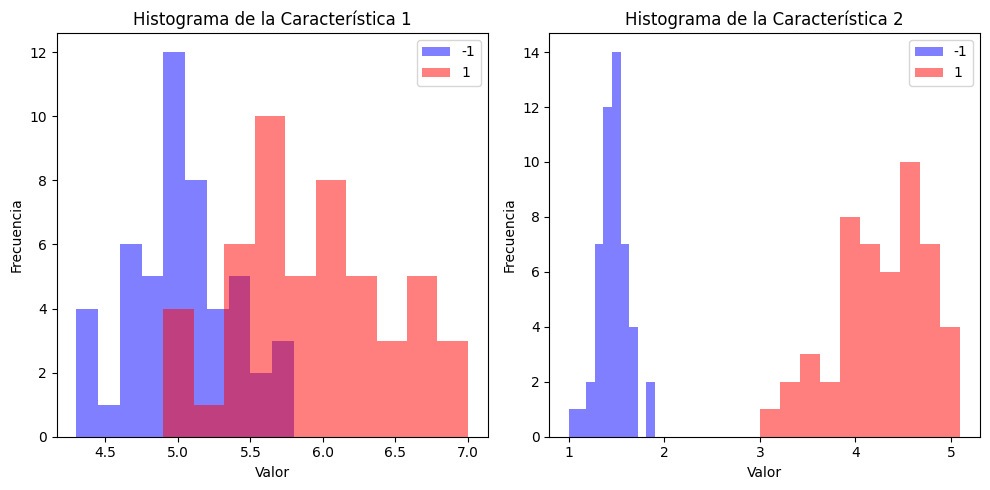

In [ ]:
# Separar datos por clase
X_class_minus1 = X[y == -1]
X_class_1 = X[y == 1]

# Graficar histogramas para cada característica y clase
plt.figure(figsize=(10, 5))

# Característica 1
plt.subplot(1, 2, 1)
plt.hist(X_class_minus1[:, 0], alpha=0.5, color='b', label='-1')
plt.hist(X_class_1[:, 0], alpha=0.5, color='r', label='1')
plt.title('Histograma de la Característica 1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

# Característica 2
plt.subplot(1, 2, 2)
plt.hist(X_class_minus1[:, 1], alpha=0.5, color='b', label='-1')
plt.hist(X_class_1[:, 1], alpha=0.5, color='r', label='1')
plt.title('Histograma de la Característica 2')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

Una de las razones por las que la normalización ayuda al aprendizaje dle descenso del gradiente es que el optimizador tiene que realizar menos pasos para encontrar una óptima solución (el mínimo coste global), ejemplificado así:

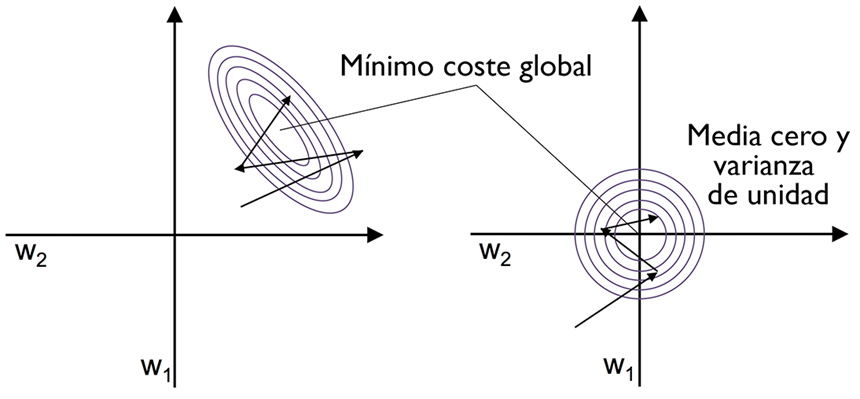

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

Se entrenada otra vez Adaline, pero en este caso, usando los datos pasados por la normalización y se observa la poderosa convergencia:

<ipython-input-14-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


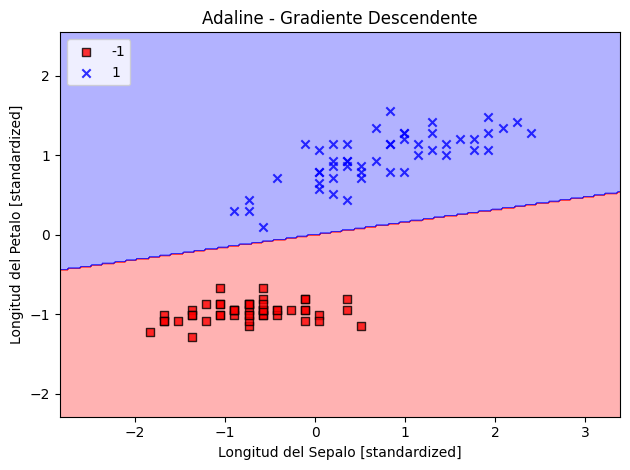

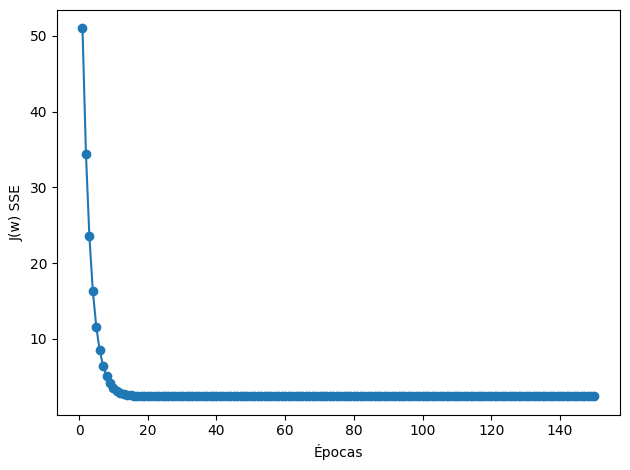

In [ ]:
ada3 = AdalineGD(n_iter=150, eta=0.01)
ada3.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada3)
plt.title('Adaline - Gradiente Descendente')
plt.xlabel('Longitud del Sepalo [standardized]')
plt.ylabel('Longitud del Petalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')

plt.tight_layout()

plt.show()

# **¿Como predecir uno o nuevos datos al modelo ya entrenado?**

Hay que tener presente que, debido al escalado de características, el modelo realizó la convergencia de manera más óptima, pero por tanto en el momento de clasificar (hacer una predección) los datos de entrada deben de ser normalizados previamente para que tenga coherencia, sino jamás ese dato nuevo que pertenece al mundo NO normalizado no dará una clasificación coherente y/o adecuada:

En el ejemplo siguiente inventaré como si tuviera una IRIS nueva con LS 6.5 cm , y LP 4 cm nueva que en teoría debe de pertenecer a la clase Versicolor.

Por tanto, no puedo predecir con esos dos valores, debo por el contrario primero normalizar y ahora si predecir:

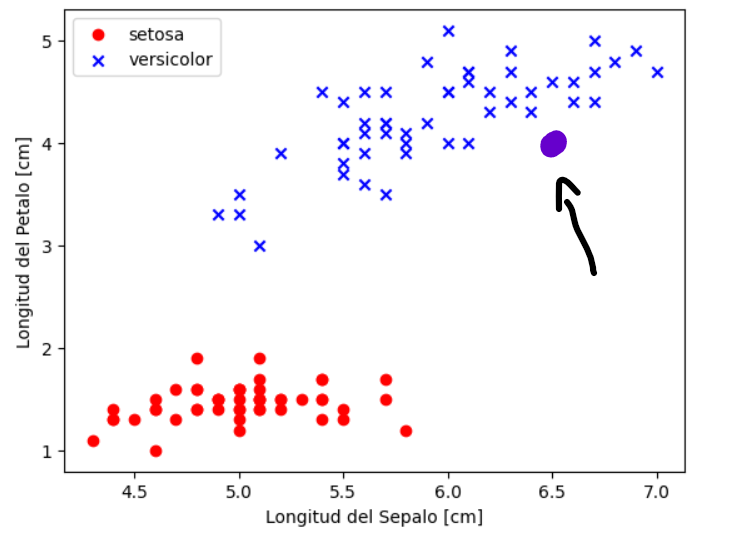

Uso entonces las mismas variables estadísticas que use para normalizar para ahora normalizar este dato nuevo:

In [ ]:
# Nuevo dato para predecir
new_data = np.array([6.5, 4])

# Normalizar el nuevo dato usando las medias y desviaciones estándar de los datos de entrenamiento
new_data_scaled = np.zeros_like(new_data)
new_data_scaled[0] = (new_data[0] - X[:, 0].mean()) / X[:, 0].std()
new_data_scaled[1] = (new_data[1] - X[:, 1].mean()) / X[:, 1].std()

print(new_data_scaled)

[1.61163562 0.78956302]


El resultado obtenido tiene sentido en el gráfico por supuesto de distribución normalizado:

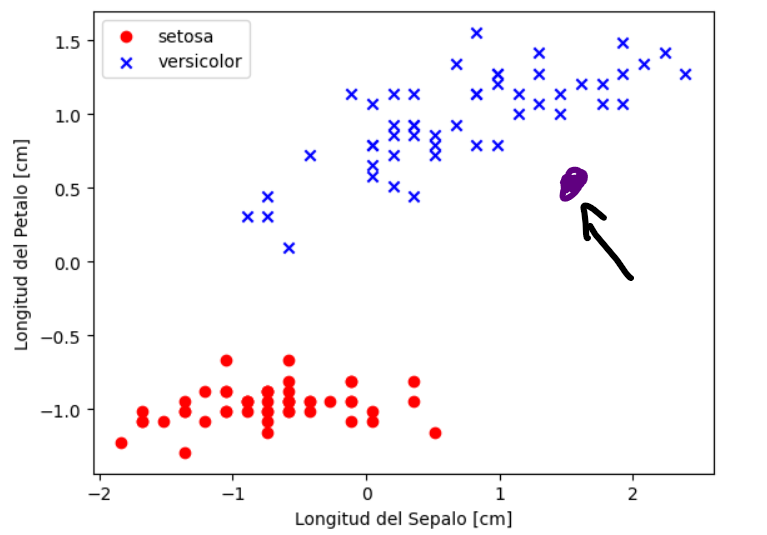

Procedo entonces a realizar la predicción:

In [ ]:

# Hacer la predicción con el modelo entrenado
prediction = ada3.predict(new_data_scaled)

print("Predicción:", prediction)

Predicción: 1
